# Regresión Polinomial

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [64]:
df = pd.read_csv('auto-mpg.csv')

In [65]:
df.head(2)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320


<AxesSubplot:title={'center':'Millas por Galón de combustible'}, xlabel='weight', ylabel='mpg'>

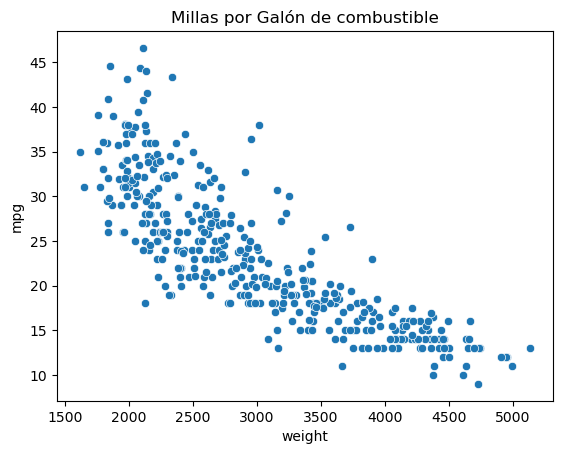

In [66]:
plt.title('Millas por Galón de combustible')
sns.scatterplot(data=df, x='weight', y='mpg')

<AxesSubplot:title={'center':'Millas por Galón de combustible'}, xlabel='weight', ylabel='mpg'>

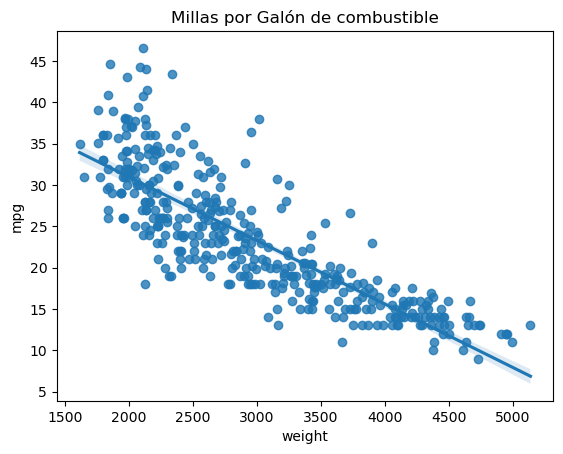

In [67]:
plt.title('Millas por Galón de combustible')
sns.regplot(data=df, x='weight', y='mpg')

<AxesSubplot:title={'center':'Millas por Galón de combustible'}, xlabel='weight', ylabel='mpg'>

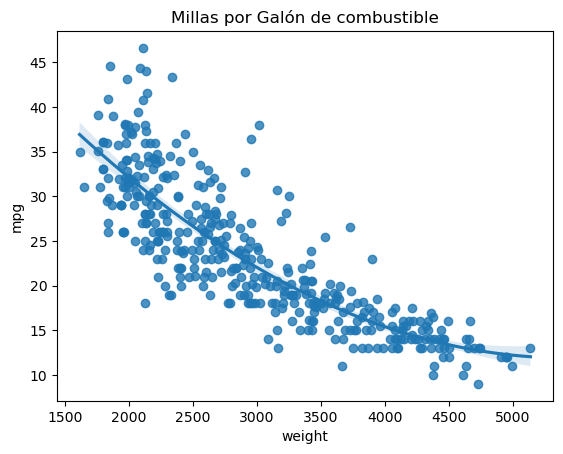

In [68]:
plt.title('Millas por Galón de combustible')
sns.regplot(data=df, x='weight', y='mpg', order=2)

## Modelo

In [69]:
X = df[['weight']]
y =df['mpg']

## Preprocesamiento

In [70]:
from sklearn.preprocessing import StandardScaler

In [71]:
scaler = StandardScaler()
X_sc = scaler.fit_transform(X)


In [72]:
X_sc[:5]

array([[0.63086987],
       [0.85433297],
       [0.55047045],
       [0.54692342],
       [0.56584093]])

In [73]:
from sklearn.preprocessing import PolynomialFeatures

In [128]:
poly_transform = PolynomialFeatures(degree=3, 
                                    include_bias=True)

In [129]:
X_poly = poly_transform.fit_transform(X_sc)

In [130]:
X_poly[:5]

array([[1.        , 0.63086987, 0.3979968 , 0.25108419],
       [1.        , 0.85433297, 0.72988483, 0.62356467],
       [1.        , 0.55047045, 0.30301772, 0.1668023 ],
       [1.        , 0.54692342, 0.29912523, 0.16359859],
       [1.        , 0.56584093, 0.32017596, 0.18116866]])

## Validación Cruzada

In [131]:
from sklearn.model_selection import train_test_split

In [132]:
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=.2, random_state=0)

## Modelo Regresivo

In [133]:
from sklearn.linear_model import LinearRegression

In [134]:
regressor = LinearRegression()

In [135]:
regressor.fit(X_train, y_train)

LinearRegression()

In [136]:
regressor.coef_

array([ 0.        , -6.98714904,  1.07571682,  0.00749393])

## Evaluación

In [137]:
y_pred = regressor.predict(X_test)

In [138]:
regressor.score(X_test,y_test)

0.7795954015136342

## Visualización

In [139]:
X_plot = np.arange(1500,5500,500).reshape(-1,1)
X_plot

array([[1500],
       [2000],
       [2500],
       [3000],
       [3500],
       [4000],
       [4500],
       [5000]])

In [140]:
X_plot_sc = scaler.transform(X_plot)

c:\Users\jorge\miniconda3\envs\machinelearning\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [141]:
X_plot_poly = poly_transform.transform(X_plot_sc)
X_plot_poly

array([[ 1.00000000e+00, -1.73854836e+00,  3.02255040e+00,
        -5.25485005e+00],
       [ 1.00000000e+00, -1.14737615e+00,  1.31647202e+00,
        -1.51048860e+00],
       [ 1.00000000e+00, -5.56203932e-01,  3.09362814e-01,
        -1.72068814e-01],
       [ 1.00000000e+00,  3.49682821e-02,  1.22278075e-03,
         4.27585423e-05],
       [ 1.00000000e+00,  6.26140496e-01,  3.92051921e-01,
         2.45479585e-01],
       [ 1.00000000e+00,  1.21731271e+00,  1.48185024e+00,
         1.80387513e+00],
       [ 1.00000000e+00,  1.80848493e+00,  3.27061772e+00,
         5.91486285e+00],
       [ 1.00000000e+00,  2.39965714e+00,  5.75835439e+00,
         1.38180762e+01]])

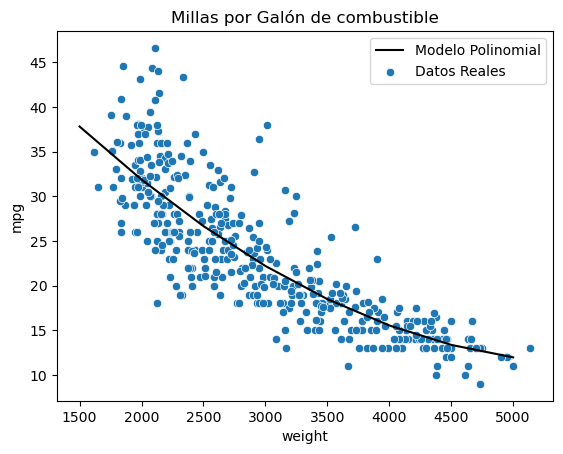

In [142]:
plt.title('Millas por Galón de combustible')
plt.plot(X_plot, regressor.predict(X_plot_poly), c='k', label='Modelo Polinomial')
sns.scatterplot(data=df, x='weight', y='mpg', label='Datos Reales')
plt.legend(loc=0)